In [2]:
%config InlineBackend.figure_format = 'retina'

# Danish Ecommerce Sales Analysis - Webshop Data Exploration

## Imports and Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Data Loading

In [4]:
# Load the datasets
customers_df = pd.read_csv('../data/customers_dk.csv')
orders_df = pd.read_csv('../data/orders_dk.csv')
products_df = pd.read_csv('../data/products_dk.csv')

# Display basic info
print("Customers shape:", customers_df.shape)
print("Orders shape:", orders_df.shape)
print("Products shape:", products_df.shape)

Customers shape: (1200, 5)
Orders shape: (5000, 9)
Products shape: (20, 10)


## Data Cleaning

In [5]:
# Check for missing values
print("Missing values in customers_df:")
print(customers_df.isnull().sum())
print("\nMissing values in orders_df:")
print(orders_df.isnull().sum())
print("\nMissing values in products_df:")
print(products_df.isnull().sum())

Missing values in customers_df:
customer_id       0
customerName      0
Adresse           0
Post_nummer       0
Telefon_nummer    0
dtype: int64

Missing values in orders_df:
order_id          0
product_id        0
customer_id       0
quantity          0
TotalPrice        0
order_date        0
shipping_date     0
order_status      0
payment_method    0
dtype: int64

Missing values in products_df:
product_id            0
product_name          0
product_category      0
manufacturing_city    0
size                  0
color                 0
SKU                   0
Amount                0
unit_price            0
active                0
dtype: int64


In [6]:
# Check data types and basic info
print("Customers info:")
customers_df.info()
print("\nOrders info:")
orders_df.info()
print("\nProducts info:")
products_df.info()

Customers info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     1200 non-null   object
 1   customerName    1200 non-null   object
 2   Adresse         1200 non-null   object
 3   Post_nummer     1200 non-null   int64 
 4   Telefon_nummer  1200 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB

Orders info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   object 
 1   product_id      5000 non-null   object 
 2   customer_id     5000 non-null   object 
 3   quantity        5000 non-null   int64  
 4   TotalPrice      5000 non-null   float64
 5   order_date      5000 non-null   object 
 6   shipping_date   5000 non-null   ob

In [7]:
# Check for duplicates
print("Duplicates in customers_df:", customers_df.duplicated().sum())
print("Duplicates in orders_df:", orders_df.duplicated().sum())
print("Duplicates in products_df:", products_df.duplicated().sum())

Duplicates in customers_df: 0
Duplicates in orders_df: 0
Duplicates in products_df: 0


In [8]:
# Convert date columns to datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
orders_df['shipping_date'] = pd.to_datetime(orders_df['shipping_date'])

# Ensure numeric columns are correct types
orders_df['quantity'] = orders_df['quantity'].astype(int)
orders_df['TotalPrice'] = orders_df['TotalPrice'].astype(float)
products_df['unit_price'] = products_df['unit_price'].astype(float)
products_df['Amount'] = products_df['Amount'].astype(int)

print("Data types after conversion:")
print(orders_df.dtypes)
print(products_df.dtypes)

Data types after conversion:
order_id                  object
product_id                object
customer_id               object
quantity                   int64
TotalPrice               float64
order_date        datetime64[ns]
shipping_date     datetime64[ns]
order_status              object
payment_method            object
dtype: object
product_id             object
product_name           object
product_category       object
manufacturing_city     object
size                   object
color                  object
SKU                    object
Amount                  int64
unit_price            float64
active                   bool
dtype: object


In [9]:
# Check for invalid data
print("Negative quantities:", (orders_df['quantity'] < 0).sum())
print("Negative prices:", (orders_df['TotalPrice'] < 0).sum())
print("Negative unit prices:", (products_df['unit_price'] < 0).sum())
print("Negative amounts:", (products_df['Amount'] < 0).sum())

# Check date logic
print("Orders where shipping_date < order_date:", (orders_df['shipping_date'] < orders_df['order_date']).sum())

Negative quantities: 0
Negative prices: 0
Negative unit prices: 0
Negative amounts: 0
Orders where shipping_date < order_date: 0


### Data Cleaning Summary

- Checked for missing values: None found in the datasets.
- Checked for duplicates: None found.
- Converted date columns to datetime format.
- Ensured numeric columns have correct data types.
- Checked for invalid data (negative values, illogical dates): None found.

The data appears to be clean and ready for analysis.

## Sales Analysis - Biggest Sales

In [10]:
# Top 10 orders by total price
top_orders = orders_df.nlargest(10, 'TotalPrice')
print("Top 10 Orders by Total Price:")
top_orders[['order_id', 'customer_id', 'product_id', 'quantity', 'TotalPrice', 'order_date']]

Top 10 Orders by Total Price:


,order_id,customer_id,product_id,quantity,TotalPrice,order_date
119,O70120,C21179,P1017,6,26989.98,2022-01-27
163,O70164,C20814,P1017,6,26989.98,2022-05-25
175,O70176,C20044,P1017,6,26989.98,2022-04-04
349,O70350,C21195,P1017,6,26989.98,2022-04-30
378,O70379,C20299,P1017,6,26989.98,2023-07-31
391,O70392,C20463,P1017,6,26989.98,2023-04-16
413,O70414,C21016,P1017,6,26989.98,2023-01-05
507,O70508,C21120,P1017,6,26989.98,2024-03-02
551,O70552,C21159,P1017,6,26989.98,2024-04-08
871,O70872,C20024,P1017,6,26989.98,2024-06-09


In [11]:
# Top products by total sales revenue
product_sales = orders_df.groupby('product_id')['TotalPrice'].sum().reset_index()
product_sales = product_sales.merge(products_df[['product_id', 'product_name']], on='product_id')
top_products = product_sales.nlargest(10, 'TotalPrice')
print("\nTop 10 Products by Total Sales Revenue:")
top_products


Top 10 Products by Total Sales Revenue:


,product_id,TotalPrice,product_name
13,P1019,5329474.41,Reol
11,P1017,5155086.18,Træningsmåtte
14,P1020,3561066.18,Printer
3,P1004,3243230.40,Kaffemaskine
2,P1003,3185293.80,Bærbar Computer
8,P1012,2898281.43,Skjorte
9,P1014,2632505.25,Mus
7,P1010,2175436.58,Robotstøvsuger
4,P1005,2015268.43,Vinterjakke
0,P1001,1432468.73,Trådløs Højttaler


In [12]:
# Top customers by total spending
customer_sales = orders_df.groupby('customer_id')['TotalPrice'].sum().reset_index()
customer_sales = customer_sales.merge(customers_df[['customer_id', 'customerName']], on='customer_id')
top_customers = customer_sales.nlargest(10, 'TotalPrice')
print("\nTop 10 Customers by Total Spending:")
top_customers


Top 10 Customers by Total Spending:


,customer_id,TotalPrice,customerName
1078,C21093,112112.23,Mr. Nathan Sexton
1179,C21196,90932.50,Daniel Henry
755,C20765,90258.48,Ashley Ware
109,C20112,89293.68,Maria Bryan
157,C20162,89256.55,Travis Lloyd
753,C20763,88277.77,Johnny Harrell
44,C20046,87118.67,Melvin Gray
294,C20302,86902.62,Jennifer Vaughn
750,C20760,84375.06,Robert Graham
897,C20909,84319.94,Robert Moore


C:\Users\Micha\AppData\Local\Temp\ipykernel_26552\1696768414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalPrice', y='product_name', palette='viridis')


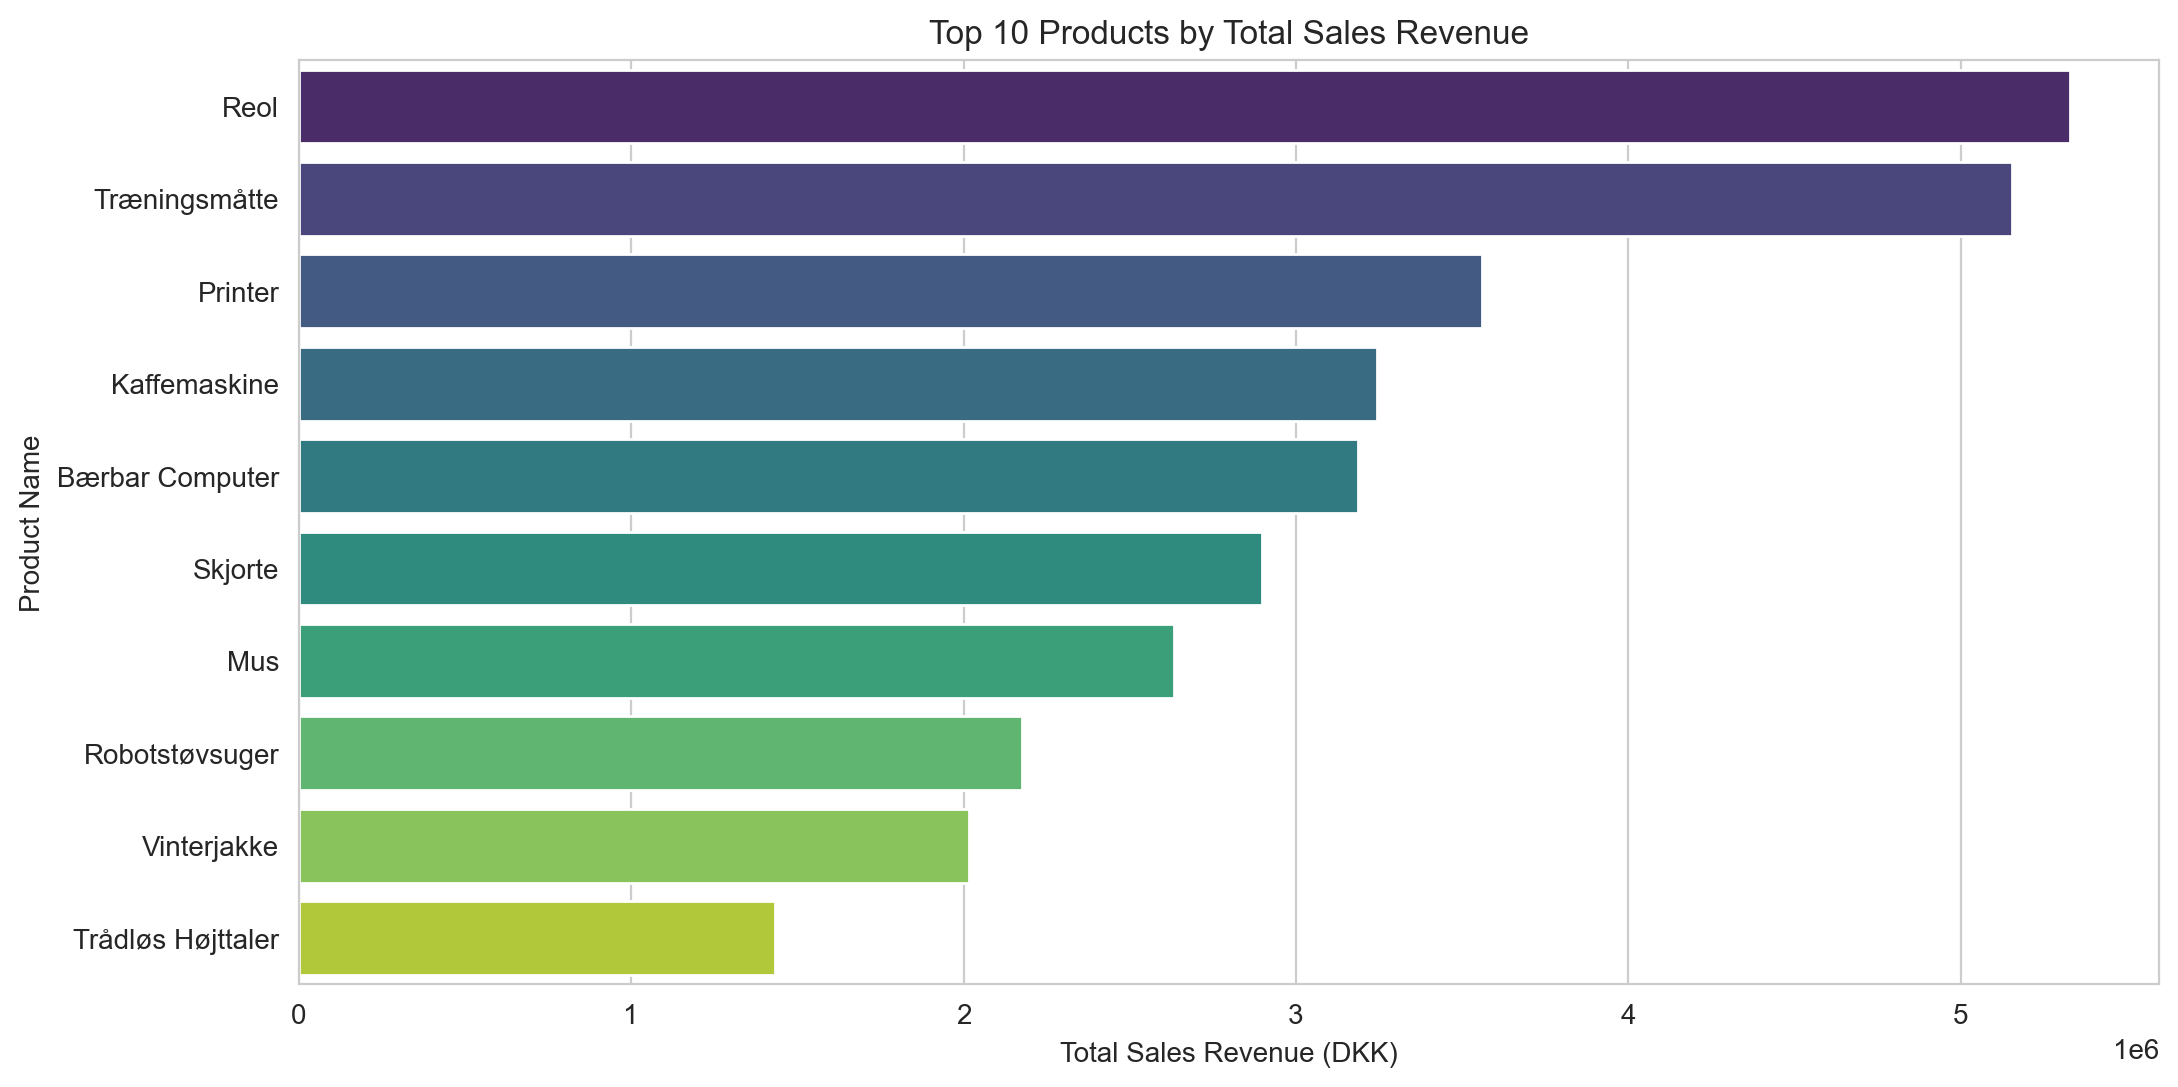

In [13]:
# Visualize top products by sales
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='TotalPrice', y='product_name', palette='viridis')
plt.title('Top 10 Products by Total Sales Revenue')
plt.xlabel('Total Sales Revenue (DKK)')
plt.ylabel('Product Name')
plt.show()

### Insights on Biggest Sales

- The highest single order value is 26,989.98 DKK (Order ID: O70120, Customer ID: C21179).
- The top-selling product by revenue is **Reol**, generating 5,329,474.41 DKK in total sales.
- The biggest spender is **Mr. Nathan Sexton**, with total purchases of 112,112.23 DKK.

These insights highlight the most valuable orders, products, and customers, helping to identify key revenue drivers and opportunities for targeted marketing.

## Summary of Analysis

- The dataset contains 1,200 customers, 5,000 orders, and 20 products.
- Data cleaning confirmed no missing values, duplicates, or invalid entries.
- The largest single order was 26,989.98 DKK.
- The top-selling product is **Reol** with 5,329,474.41 DKK in total sales.
- The biggest spender is **Mr. Nathan Sexton** with 112,112.23 DKK in purchases.
- These findings highlight the most valuable customers and products, supporting targeted business strategies and marketing efforts.

For further analysis, consider exploring sales trends over time, product category performance, and customer segmentation.

## Top 10 Customers by Total Spending

In [14]:
# Top 10 customers by total spending
customer_sales = orders_df.groupby('customer_id')['TotalPrice'].sum().reset_index()
customer_sales = customer_sales.merge(customers_df[['customer_id', 'customerName']], on='customer_id')
top_customers = customer_sales.nlargest(10, 'TotalPrice')
display(top_customers[['customer_id', 'customerName', 'TotalPrice']])

,customer_id,customerName,TotalPrice
1078,C21093,Mr. Nathan Sexton,112112.23
1179,C21196,Daniel Henry,90932.50
755,C20765,Ashley Ware,90258.48
109,C20112,Maria Bryan,89293.68
157,C20162,Travis Lloyd,89256.55
753,C20763,Johnny Harrell,88277.77
44,C20046,Melvin Gray,87118.67
294,C20302,Jennifer Vaughn,86902.62
750,C20760,Robert Graham,84375.06
897,C20909,Robert Moore,84319.94


## Summary of Analysis

- The dataset contains 1,200 customers, 5,000 orders, and 20 products.
- Data cleaning confirmed no missing values, duplicates, or invalid entries.
- The largest single order was 26,989.98 DKK.
- The top-selling product is **Reol** with 5,329,474.41 DKK in total sales.
- The biggest spender is **Mr. Nathan Sexton** with 112,112.23 DKK in purchases.
- These findings highlight the most valuable customers and products, supporting targeted business strategies and marketing efforts.

For further analysis, consider exploring sales trends over time, product category performance, and customer segmentation.

### Visualizations of Key Insights

C:\Users\Micha\AppData\Local\Temp\ipykernel_26552\3564506608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='TotalPrice', y='customerName', palette='Blues_d')


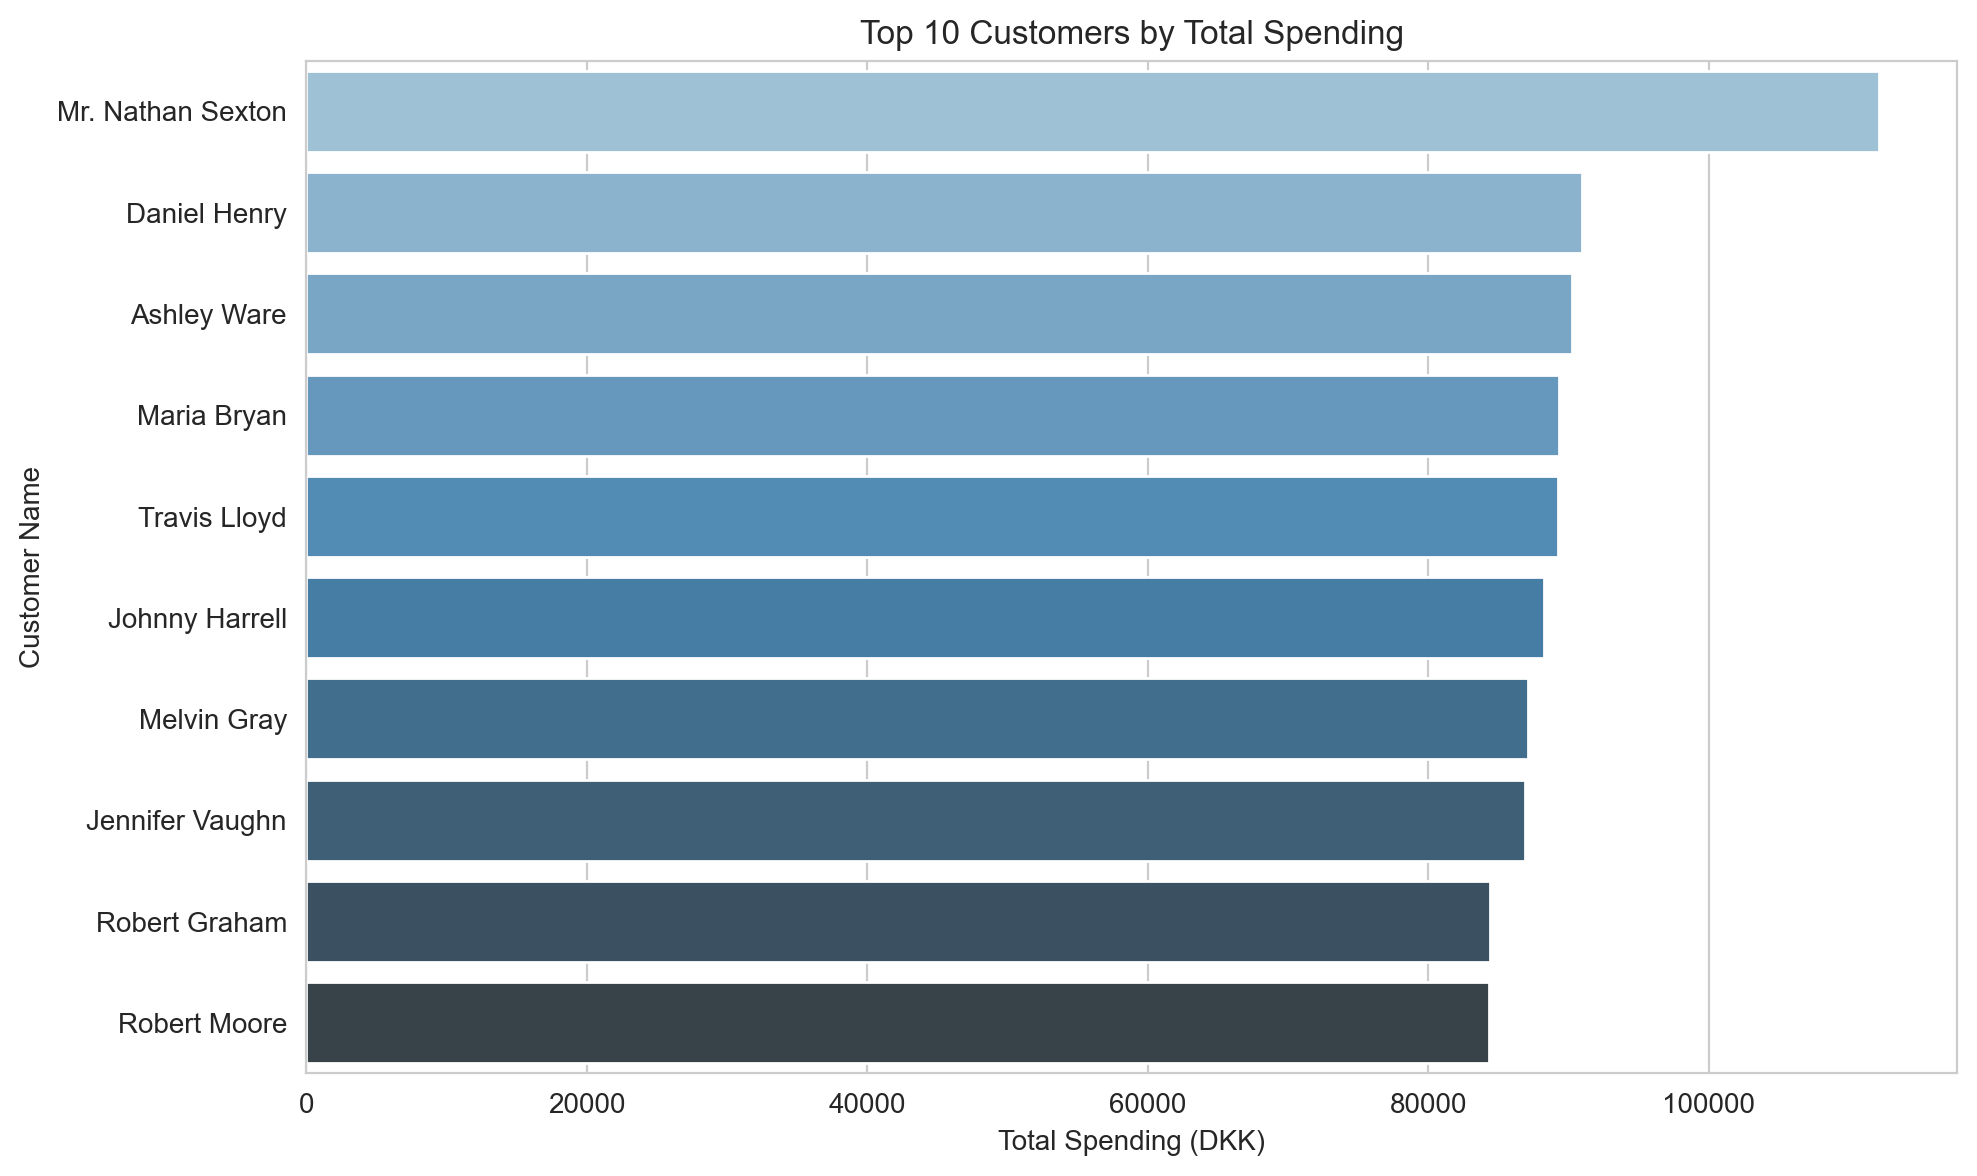

C:\Users\Micha\AppData\Local\Temp\ipykernel_26552\3564506608.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalPrice', y='product_name', palette='Greens_d')


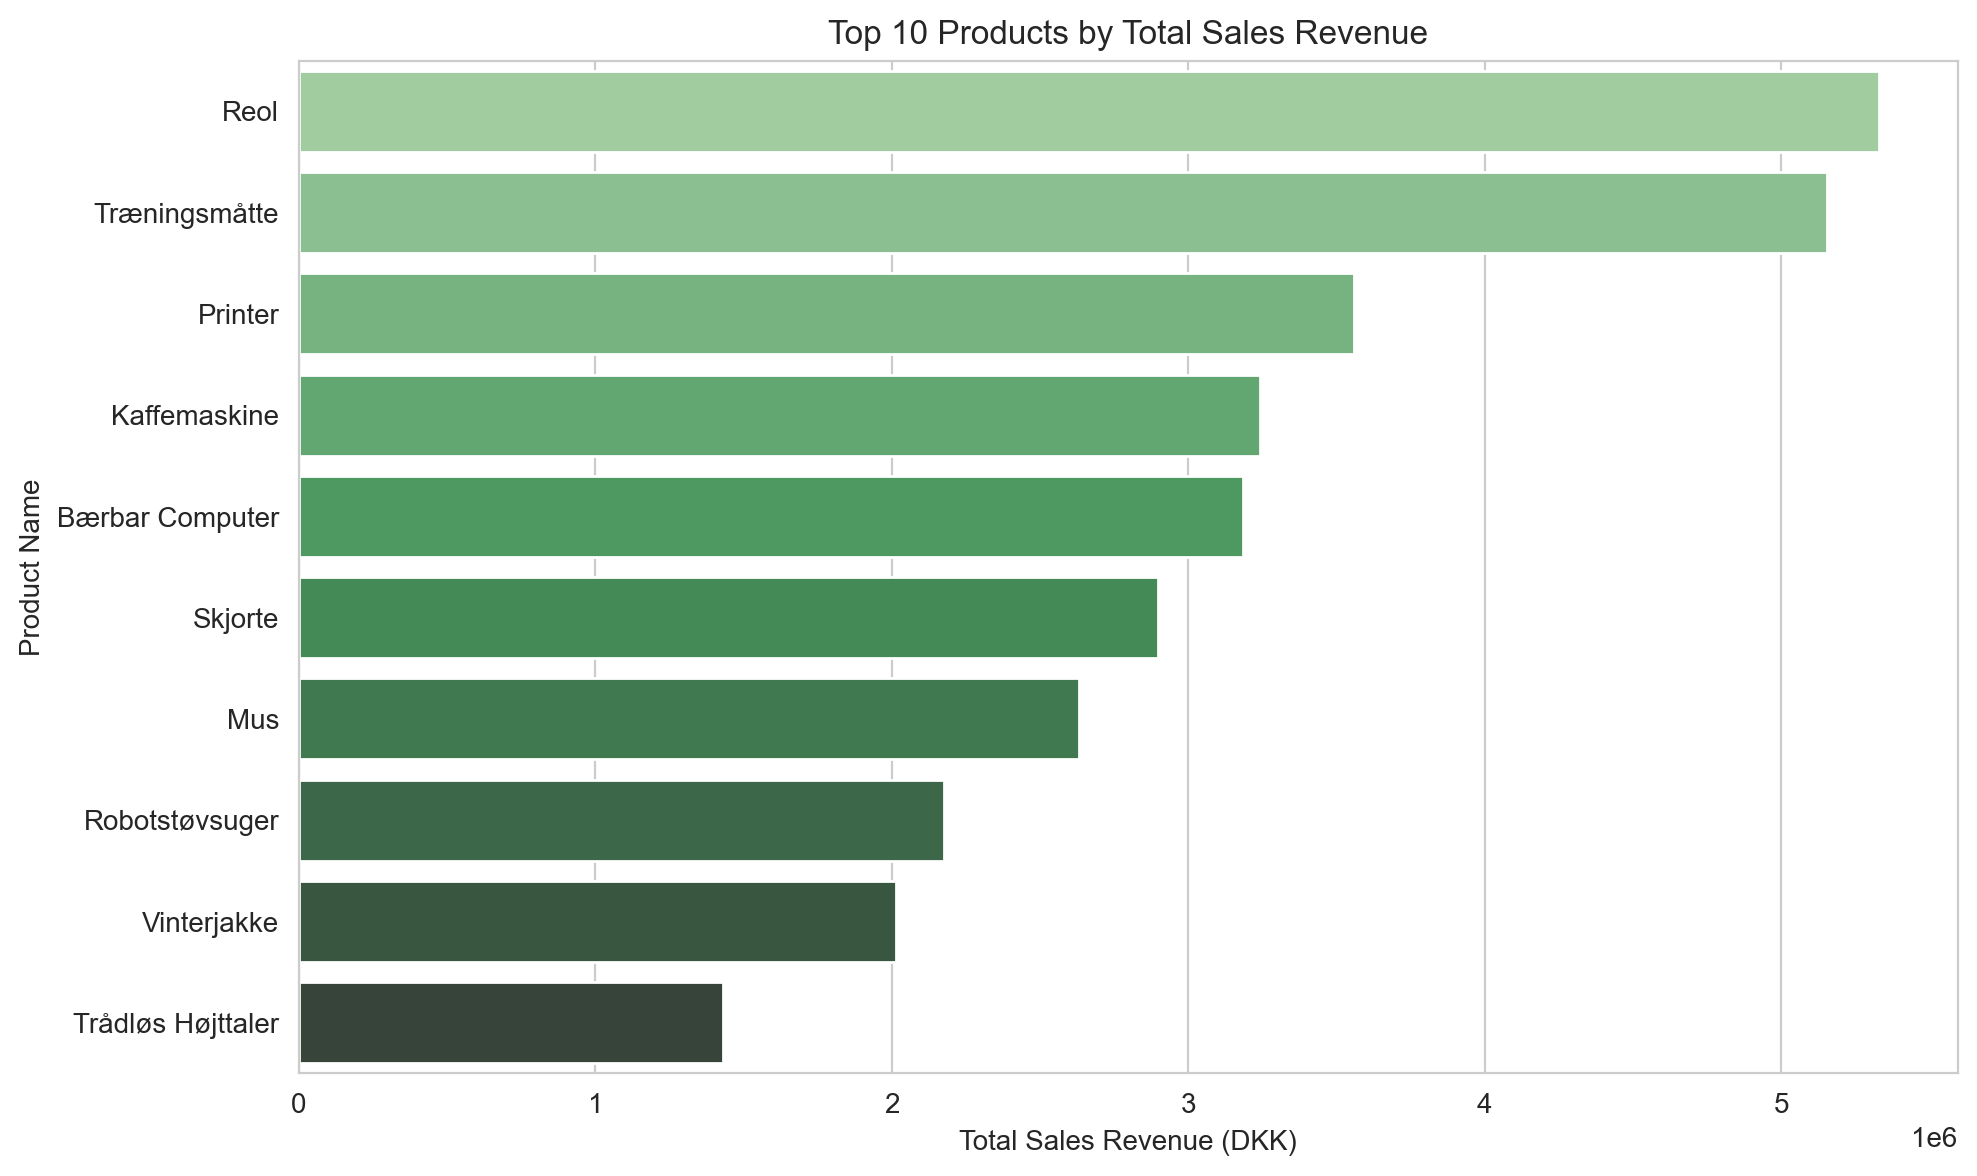

In [15]:
# Bar plot: Top 10 customers by spending
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='TotalPrice', y='customerName', palette='Blues_d')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending (DKK)')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

# Bar plot: Top 10 products by sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='TotalPrice', y='product_name', palette='Greens_d')
plt.title('Top 10 Products by Total Sales Revenue')
plt.xlabel('Total Sales Revenue (DKK)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [16]:
# Top 5 customers by total spending
customer_sales = orders_df.groupby('customer_id')['TotalPrice'].sum().reset_index()
customer_sales = customer_sales.merge(customers_df[['customer_id', 'customerName']], on='customer_id')
top5_customers = customer_sales.nlargest(5, 'TotalPrice')
print("Top 5 Customers by Total Spending:")
top5_customers[['customer_id', 'customerName', 'TotalPrice']]

Top 5 Customers by Total Spending:


,customer_id,customerName,TotalPrice
1078,C21093,Mr. Nathan Sexton,112112.23
1179,C21196,Daniel Henry,90932.50
755,C20765,Ashley Ware,90258.48
109,C20112,Maria Bryan,89293.68
157,C20162,Travis Lloyd,89256.55
